<a href="https://colab.research.google.com/github/Talieh-m/Data_Science/blob/main/Naive_Bayes_%26_Random_Forst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Librairies & Defining the Dataset




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df= pd.read_csv('creditcard.csv')


Data Prepration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
plt.figure()
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


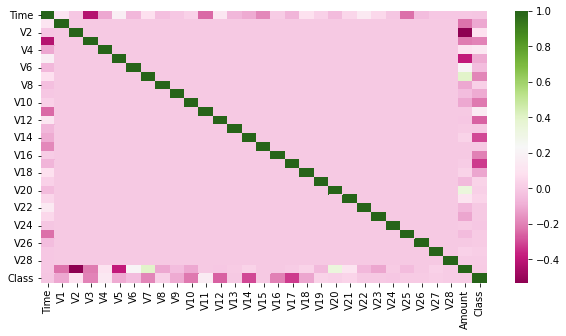

In [ ]:
dataset_co = df.corr()
plt.figure(figsize=(10,5))
sn.heatmap(dataset_co,cmap="PiYG")

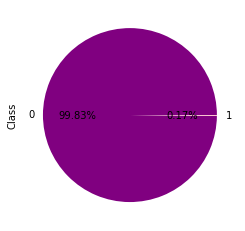

In [ ]:
df['Class'].value_counts().plot.pie( autopct = "%.2f%%", colors = ['purple', 'pink'] )

In [ ]:
#defining x and y
x= df.iloc[:,1:29].values
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split ( x, y, test_size=0.2, random_state=1)
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.transform (x_test)
#Balancing
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
x_o, y_o = over_sampler.fit_resample(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Training & Evaluating

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_decision_tree.fit(x_o,y_o)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[[56857    23]
 [   18    64]]


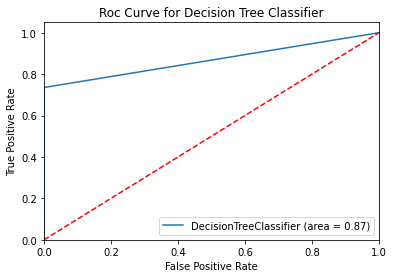

In [ ]:
Models=[]
Acc_score=[]
f1_s=[]
Models.append('Decision Tree Classifier')
y_pred_decision_tree= classifier_decision_tree.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve
#cm=confusion_matrix(y_pred_decision_tree, y_test)
#from sklearn.metrics import plot_confusion_matrix
#class_names=np.array(['0','1']) 
#plot_confusion_matrix(cm,class_names,y_true=)
print(confusion_matrix(y_pred_decision_tree,y_test))
accuracy_decision_tree=np.round(accuracy_score(y_pred_decision_tree, y_test), decimals=3)
Acc_score.append(accuracy_decision_tree)
f1_decision_tree=f1_score(y_test, y_pred_decision_tree)
f1_s.append(f1_decision_tree)
roc_decision_tree = roc_auc_score(y_test, y_pred_decision_tree)
fpr, tpr, thresholds_decision_tree = roc_curve(y_test, classifier_decision_tree.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DecisionTreeClassifier (area = %0.2f)'% roc_decision_tree)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for Decision Tree Classifier')
plt.legend(loc="lower right") 
plt.show()

In [ ]:
#from sklearn.svm import SVC
#classifier_svc = SVC(kernel='linear', random_state=0)
#classifier_svc.fit(x_o,y_o)

In [ ]:
#Models.append('SVC')
#y_pred_svc= classifier_svc.predict(x_test)
#cm=confusion_matrix(y_pred_svc, y_test)
#plot_confusion_matrix(cm,class_names)
#accuracy_svc=np.round(accuracy_score(y_pred_svc, y_test), decimals=3)
#Acc_score.append(accuracy_svc)
#f1_svc=f1_score(y_test, y_pred_svc)
#f1_score.append(f1_svc)
#roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
#fpr, tpr, thresholds_svc = roc_curve(y_test, classifier_svc.predict_proba(x_test)[:,1])
#plt.figure()
#plt.plot(fpr, tpr, label='SVC (area = %0.2f)'% roc_auc_svc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Roc Curve for svc')
#plt.legend(loc="lower right") 
#plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_gussian= GaussianNB()
classifier_gussian.fit(x_o,y_o)

GaussianNB(priors=None, var_smoothing=1e-09)

[[55448    18]
 [ 1427    69]]


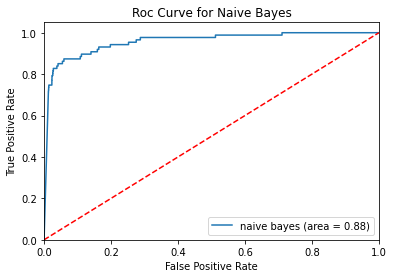

In [ ]:
Models.append('Naive Bayes')
y_pred_naive= classifier_gussian.predict(x_test)
#cm=confusion_matrix(y_pred_naive, y_test)
print(confusion_matrix(y_pred_naive,y_test))
accuracy_naive=np.round(accuracy_score(y_pred_naive, y_test), decimals=3)
Acc_score.append(accuracy_naive)
f1_naive=f1_score(y_test, y_pred_naive)
f1_s.append(f1_naive)
roc_naive = roc_auc_score(y_test, y_pred_naive)
fpr, tpr, thresholds_naive = roc_curve(y_test, classifier_gussian.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='naive bayes (area = %0.2f)'% roc_naive)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve for Naive Bayes')
plt.legend(loc="lower right") 
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_random_forest= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_random_forest.fit(x_o,y_o)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[0 0 0 ... 0 0 0]
[[56870     5]
 [   21    66]]


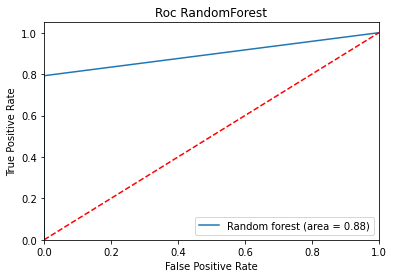

In [ ]:
Models.append('Random Forest')
y_pred_random_forest= classifier_random_forest.predict(x_test)
print(y_pred_random_forest)
print(confusion_matrix(y_test,y_pred_random_forest))
accuracy=accuracy_score(y_test,y_pred_random_forest)
Acc_score.append(accuracy)
f1_random_forest=f1_score(y_test, y_pred_random_forest)
f1_s.append(f1_random_forest)
roc_random_forest = roc_auc_score(y_test, y_pred_random_forest)
fpr, tpr, thresholds_random_forest = roc_curve(y_test, classifier_random_forest.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)'% roc_random_forest)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc RandomForest')
plt.legend(loc="lower right") 
plt.show()

In [ ]:
comparing_models=pd.DataFrame({'Models':Models,'Accuracy_score':Acc_score,'f1_score':f1_s}, columns=['Models','Accuracy_score','f1_score'])
comparing_models

,Models,Accuracy_score,f1_score
0,Decision Tree Classifier,0.999000,0.757396
1,Naive Bayes,0.975000,0.087176
2,Random Forest,0.999544,0.835443


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear', random_state=0)
from sklearn.naive_bayes import GaussianNB
classifier_gussian= GaussianNB()
from sklearn.ensemble import RandomForestClassifier
classifier_random_forest= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
comparing_models=[]
comparing_models.append(('DecisionTreeClassifier',classifier_decision_tree))
comparing_models.append(('SVC',classifier_svc))
comparing_models.append(('naive_bayes',classifier_gussian))
comparing_models.append(('RandomForestClassifier',classifier_random_forest))

Model=[]
cvs=[]
score=[]
roc_score=[]
for name,model in models:
    print('<><><><><><><><><><><>',name,'<><><><><><><><><><><>')
    print('\n')
    Model.append(name)
    model.fit(x_o,y_o)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,y_pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=42)
    cv=model_selection.cross_val_score(model,x_o,y_o,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,y_pred))
     print('\n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()